In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [2]:
# Data Loading


#training data
data_train = pd.read_csv("austinHousingData.csv")
data_train.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [3]:
# Columnas descartables de inicio
data_train = data_train.drop(["description","homeImage","zpid","streetAddress","latest_saledate","latestPriceSource"], axis=1)

In [4]:
#Cogemos los datos que queremos
data_train = data_train[data_train['city'] == 'austin']
data_train = data_train[data_train['homeType'] == 'Single Family']
data_train = data_train[data_train['latestPrice'] <= 2000000]

In [5]:
#Tiene los mismos valores siempre, entonces no aporta nada
data_train = data_train.drop(["city","homeType"], axis=1)

In [6]:
# Cheking null values
data_train.isnull().sum()*100/data_train.shape[0]

zipcode                       0.0
latitude                      0.0
longitude                     0.0
propertyTaxRate               0.0
garageSpaces                  0.0
hasAssociation                0.0
hasCooling                    0.0
hasGarage                     0.0
hasHeating                    0.0
hasSpa                        0.0
hasView                       0.0
parkingSpaces                 0.0
yearBuilt                     0.0
latestPrice                   0.0
numPriceChanges               0.0
latest_salemonth              0.0
latest_saleyear               0.0
numOfPhotos                   0.0
numOfAccessibilityFeatures    0.0
numOfAppliances               0.0
numOfParkingFeatures          0.0
numOfPatioAndPorchFeatures    0.0
numOfSecurityFeatures         0.0
numOfWaterfrontFeatures       0.0
numOfWindowFeatures           0.0
numOfCommunityFeatures        0.0
lotSizeSqFt                   0.0
livingAreaSqFt                0.0
numOfPrimarySchools           0.0
numOfElementar

In [7]:
numeric_cols = data_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = data_train.select_dtypes(include=['category','bool']).columns.to_list()

In [8]:
data_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13918 entries, 17 to 15170
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hasAssociation  13918 non-null  bool 
 1   hasCooling      13918 non-null  bool 
 2   hasGarage       13918 non-null  bool 
 3   hasHeating      13918 non-null  bool 
 4   hasSpa          13918 non-null  bool 
 5   hasView         13918 non-null  bool 
dtypes: bool(6)
memory usage: 190.3 KB


In [9]:
data_train[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13918 entries, 17 to 15170
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zipcode                     13918 non-null  int64  
 1   latitude                    13918 non-null  float64
 2   longitude                   13918 non-null  float64
 3   propertyTaxRate             13918 non-null  float64
 4   garageSpaces                13918 non-null  int64  
 5   parkingSpaces               13918 non-null  int64  
 6   yearBuilt                   13918 non-null  int64  
 7   latestPrice                 13918 non-null  float64
 8   numPriceChanges             13918 non-null  int64  
 9   latest_salemonth            13918 non-null  int64  
 10  latest_saleyear             13918 non-null  int64  
 11  numOfPhotos                 13918 non-null  int64  
 12  numOfAccessibilityFeatures  13918 non-null  int64  
 13  numOfAppliances             13

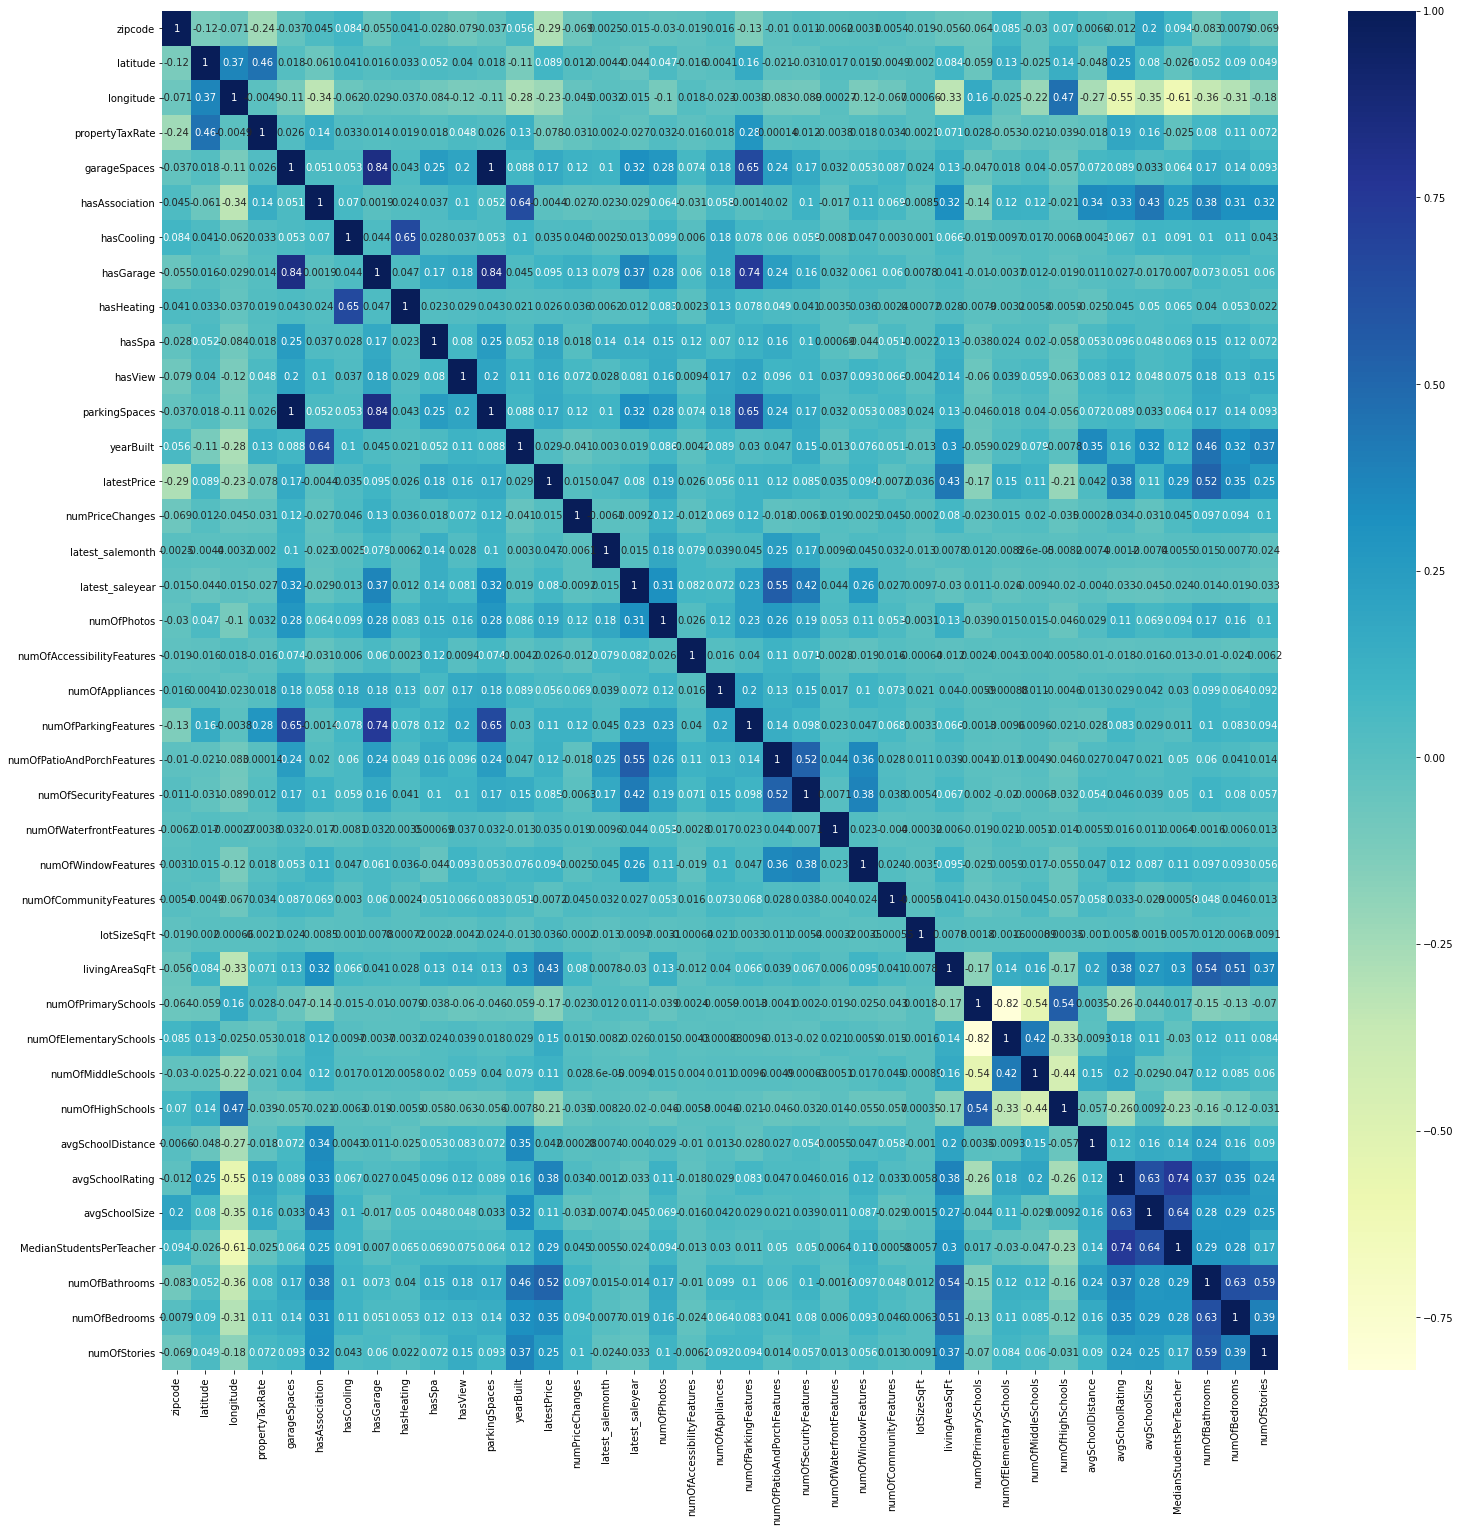

In [10]:
# Correlations
plt.figure(figsize=(25,25))
sns.heatmap(data_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [11]:
#idéntica a parking Spaces
data_train = data_train.drop(["garageSpaces"], axis=1)

In [12]:
#Prefijos para las dummies
new_column_names = [
    'Dmy_association',
    'Dmy_cooling',
    'Dmy_garage',
    'Dmy_heating',
    'Dmy_spa',
    'Dmy_view'
]

In [13]:
data=pd.get_dummies(data_train, columns=cat_cols, prefix=new_column_names,drop_first=True, dtype= 'int64' ) 
print(data.dtypes)

zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSchools                int64
avgSchoolDistance             float64
avgSchoolRat

In [14]:
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
# ==============================================================================
X= data.drop(['latestPrice'], axis=1)
y = data['latestPrice']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        #y.values.reshape(-1,1),
                                        y,
                                        train_size   = 0.8,  # 80% for training
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [15]:
import statsmodels.api as sm

# Preparing exog and endg variables
X_all = X_train                
y_all = y_train

# Add a constant to get an intercept
X_all_sm = sm.add_constant(X_all)

# Fit the resgression line using ‘OLS’
model_all = sm.OLS(y_all, X_all_sm).fit()

print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     346.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:51:31   Log-Likelihood:            -1.5110e+05
No. Observations:               11134   AIC:                         3.023e+05
Df Residuals:                   11096   BIC:                         3.026e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [16]:
data.value_counts("Dmy_cooling_True")

Dmy_cooling_True
1    13701
0      217
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
# ==============================================================================
X2 = data.drop(['latestPrice','numOfAppliances','numOfSecurityFeatures','numOfAccessibilityFeatures', 'numOfWindowFeatures', 'MedianStudentsPerTeacher', 'avgSchoolDistance', 'Dmy_cooling_True','latest_salemonth','Dmy_heating_True'], axis=1)
y2 = data['latestPrice']


X_train, X_test, y_train, y_test = train_test_split(
                                        X2,
                                        #y.values.reshape(-1,1),
                                        y2,
                                        train_size   = 0.8,  # 80% for training
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [18]:
import statsmodels.api as sm

# Preparing exog and endg variables
X_all = X_train                
y_all = y_train

# Add a constant to get an intercept
X_all_simp = sm.add_constant(X_all)

# Fit the resgression line using ‘OLS’
model_simp = sm.OLS(y_all, X_all_simp).fit()

print(model_simp.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     456.3
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:51:31   Log-Likelihood:            -1.5111e+05
No. Observations:               11134   AIC:                         3.023e+05
Df Residuals:                   11105   BIC:                         3.025e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [19]:
# VIF estimation

from statsmodels.stats.outliers_influence import variance_inflation_factor


print("Columns for VIF estimation", X_all_simp.columns)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_all_simp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_all_simp.values, i)
                        for i in range(len(X_all_simp.columns))]

print(vif_data) 

Columns for VIF estimation Index(['const', 'zipcode', 'latitude', 'longitude', 'propertyTaxRate',
       'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'latest_saleyear',
       'numOfPhotos', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfWaterfrontFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolRating',
       'avgSchoolSize', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
       'Dmy_association_True', 'Dmy_garage_True', 'Dmy_spa_True',
       'Dmy_view_True'],
      dtype='object')
                       feature           VIF
0                        const  4.511883e+07
1                      zipcode  1.254815e+00
2                     latitude  2.551610e+00
3                    longitude  3.364203e+00
4              propertyTaxRate  1.817193e+00
5                parkingSpaces  3.612500e+00
6                    yearBuilt 

In [20]:

# Interacción Heating Cooling
# ==============================================================================
# Adding column of interaction
X_all_simp['cooling*heating'] = X_all_sm['Dmy_heating_True'] * X_all_sm['Dmy_cooling_True']
y_all_simp = y_train

# Add a constant to get an intercept
X_simp_all_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_interac2 = sm.OLS(y_all_simp, X_all_simp).fit()


print(model_interac2.summary())


                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     440.7
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:51:31   Log-Likelihood:            -1.5111e+05
No. Observations:               11134   AIC:                         3.023e+05
Df Residuals:                   11104   BIC:                         3.025e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [21]:
# Interacción Latitud Longitud
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
# ==============================================================================
X2 = data.drop(['latestPrice','numOfAppliances','numOfPatioAndPorchFeatures','numOfSecurityFeatures','numOfAccessibilityFeatures', 'numOfWindowFeatures', 'MedianStudentsPerTeacher', 'avgSchoolDistance', 'Dmy_cooling_True','lotSizeSqFt','Dmy_heating_True'], axis=1)
y2 = data['latestPrice']


X_train, X_test, y_train, y_test = train_test_split(
                                        X2,
                                        #y.values.reshape(-1,1),
                                        y2,
                                        train_size   = 0.8,  # 80% for training
                                        random_state = 1234,
                                        shuffle      = True)
#Preparing exog and endg variables
X_all = X_train                
y_all = y_train

# Add a constant to get an intercept
X_all_simp = sm.add_constant(X_all)
# ==============================================================================
# Adding column of interaction
X_all_simp['lat*long'] = X_all_simp['latitude'] * X_all_simp['longitude']
y_all_simp = y_train

# Add a constant to get an intercept
X_simp_all_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_interac2 = sm.OLS(y_all_simp, X_all_simp).fit()


print(model_interac2.summary())


                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     464.8
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:51:31   Log-Likelihood:            -1.5106e+05
No. Observations:               11134   AIC:                         3.022e+05
Df Residuals:                   11105   BIC:                         3.024e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [22]:
# VIF estimation final

from statsmodels.stats.outliers_influence import variance_inflation_factor


print("Columns for VIF estimation", X_all_simp.columns)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_all_simp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_all_simp.values, i)
                        for i in range(len(X_all_simp.columns))]

print(vif_data) 

Columns for VIF estimation Index(['const', 'zipcode', 'latitude', 'longitude', 'propertyTaxRate',
       'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos', 'numOfParkingFeatures',
       'numOfWaterfrontFeatures', 'numOfCommunityFeatures', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolRating', 'avgSchoolSize',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
       'Dmy_association_True', 'Dmy_garage_True', 'Dmy_spa_True',
       'Dmy_view_True', 'lat*long'],
      dtype='object')
                    feature           VIF
0                     const  2.296056e+11
1                   zipcode  1.350901e+00
2                  latitude  2.457501e+06
3                 longitude  1.753639e+05
4           propertyTaxRate  1.842049e+00
5             parkingSpaces  3.615040e+00
6                 yearBuilt  2.086759e+00
7           numPriceCha

In [23]:
# Estimation error
# ==============================================================================
prediction_train =model_interac2.predict(exog=X_all_simp)

#Conversion series object to vector
prediction_train=prediction_train.to_numpy()


print ("pred real", prediction_train.shape, y_train.shape)

residuals_train   = y_all_simp-prediction_train

print ("pred real residual", prediction_train.shape, y_train.shape, residuals_train.shape)

pred real (11134,) (11134,)
pred real residual (11134,) (11134,) (11134,)


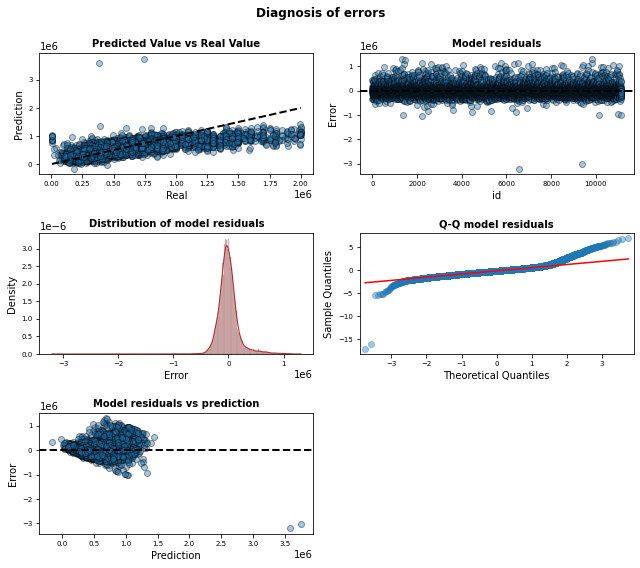

In [24]:
# Graphics
# ============================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))
y_train=y_all_simp


axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuals_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model residuals', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model residuals vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Error')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnosis of errors', fontsize = 12, fontweight = "bold");

Examples with higher Cook distance [ 6571  9371  8918    52  4387  2222 10806  1004  7296  7135]


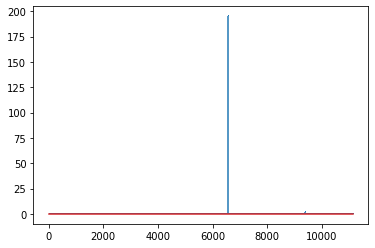

In [25]:
#' ## Cooks distance

influence = model_interac2.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance

#PLotting Cook distance:
plt.stem(np.arange(len(c)), c, markerfmt=",")

# samples with higher coolk distancve
idx = (-c).argsort()[:10] # 10 cases

print("Examples with higher Cook distance", idx)


# Plotting influence graphic

#In statsmodels .influence_plot the influence of each point can be visualized by the criterion keyword argument. 
#Options are Cook’s distance and DFFITS, two measures of influence. 

#Steps to compute Cook’s distance:

#Delete observations one at a time.
#Refit the regression model on remaining (n−1) observations
#Examine how much all of the fitted values change when the ith observation is deleted.
#fig = sm.graphics.influence_plot(model_interac2, criterion="cooks")
#fig.tight_layout(pad=1.0)

#To identify values with high influence, we look for observations with:

#big blue points (high Cook’s distance) and
#high leverage (X-axis) which additionally have
#high or low studentized residuals (Y-axis).


In [26]:
data.iloc[7392]

zipcode                        78759.000000
latitude                          30.368725
longitude                        -97.752914
propertyTaxRate                    1.980000
parkingSpaces                      2.000000
yearBuilt                       1970.000000
latestPrice                   499900.000000
numPriceChanges                    1.000000
latest_salemonth                   7.000000
latest_saleyear                 2020.000000
numOfPhotos                       28.000000
numOfAccessibilityFeatures         0.000000
numOfAppliances                    3.000000
numOfParkingFeatures               2.000000
numOfPatioAndPorchFeatures         2.000000
numOfSecurityFeatures              0.000000
numOfWaterfrontFeatures            0.000000
numOfWindowFeatures                0.000000
numOfCommunityFeatures             0.000000
lotSizeSqFt                    12632.400000
livingAreaSqFt                  1619.000000
numOfPrimarySchools                1.000000
numOfElementarySchools          

In [27]:
# Modelo sin outliers(descartado)

# Interacción Latitud Longitud
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
# ==============================================================================
X2 = data.drop(['latestPrice','numOfAppliances','numOfSecurityFeatures','numOfAccessibilityFeatures', 'numOfWindowFeatures', 'MedianStudentsPerTeacher', 'avgSchoolDistance', 'Dmy_cooling_True','latest_salemonth','Dmy_heating_True'], axis=1)
y2 = data['latestPrice']
X3 = X2.drop(index=[6571])
y3 = y2.drop(index=[6571])

X_train, X_test, y_train, y_test = train_test_split(
                                        X3,
                                        #y.values.reshape(-1,1),
                                        y3,
                                        train_size   = 0.8,  # 80% for training
                                        random_state = 1234,
                                        shuffle      = True)
#Preparing exog and endg variables
X_all = X_train                
y_all = y_train

# Add a constant to get an intercept
X_all_simp = sm.add_constant(X_all)
# ==============================================================================
# Adding column of interaction
X_all_simp['lat*long'] = X_all_simp['latitude'] * X_all_simp['longitude']
y_all_simp = y_train

# Add a constant to get an intercept
X_simp_all_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_def = sm.OLS(y_all_simp, X_all_simp).fit()


print(model_def.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     444.2
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:51:34   Log-Likelihood:            -1.5123e+05
No. Observations:               11133   AIC:                         3.025e+05
Df Residuals:                   11103   BIC:                         3.027e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [28]:
# Estimation error
# ==============================================================================
prediction_train =model_def.predict(exog=X_all_simp)

#Conversion series object to vector
prediction_train=prediction_train.to_numpy()


print ("pred real", prediction_train.shape, y_train.shape)

residuals_train   = y_all_simp-prediction_train

print ("pred real residual", prediction_train.shape, y_train.shape, residuals_train.shape)

pred real (11133,) (11133,)
pred real residual (11133,) (11133,) (11133,)


Entrenamiento

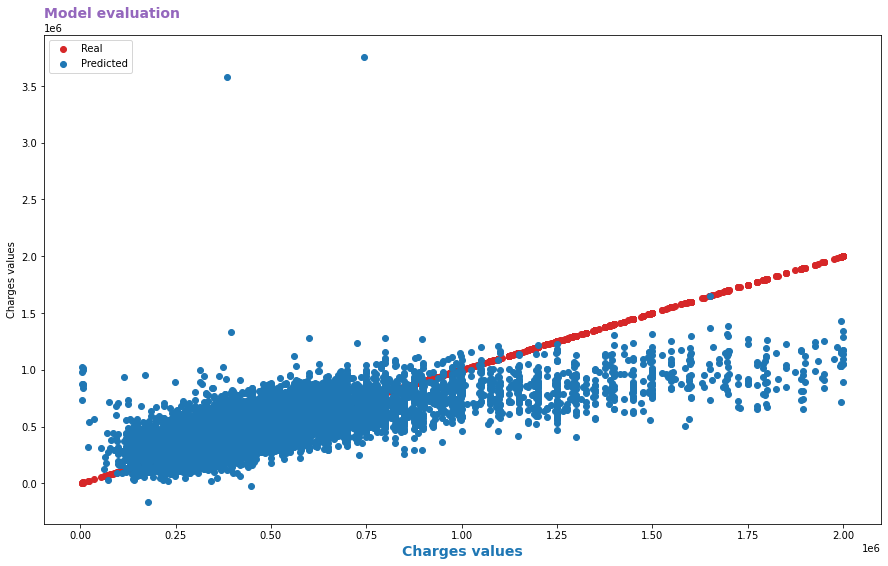

In [29]:
#######  TRAIN

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Charges values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Charges values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

In [30]:
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Indicators of the model obtained
print('Mean Absolute Error - training:', metrics.mean_absolute_error(y_train, prediction_train))  
print('Mean Squared Error - training:', metrics.mean_squared_error(y_train, prediction_train))  
print('Root Mean Squared Error - training:', np.sqrt(metrics.mean_squared_error(y_train, prediction_train)))

Mean Absolute Error - training: 127717.3507673744
Mean Squared Error - training: 36841745850.5697
Root Mean Squared Error - training: 191942.0377368379


Test


In [31]:
# Estimation error in TEST (new cases do not included in training datasey)
# ==============================================================================

# Add a constant to get an intercept
X_test_c = sm.add_constant(X_test, prepend=True)
X_test_c['lat*long'] = X_test_c['latitude'] * X_test_c['longitude'] 
prediction_test = model_def.predict(exog=X_test_c)

#Conversion series object to vector
prediction_test=prediction_test.to_numpy()


#print ("pred real", prediction_train.shape, y_train.shape)

residuals_test   = y_test-prediction_test

print ("pred real residual", prediction_test.shape, y_test.shape, residuals_test.shape)

pred real residual (2784,) (2784,) (2784,)


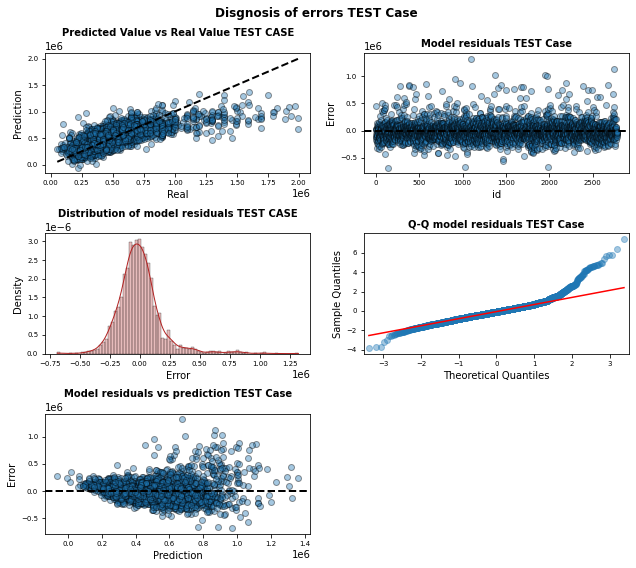

In [32]:
# Graphics
# ============================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))


axes[0, 0].scatter(y_test, prediction_test, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value TEST CASE', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals TEST Case', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals TEST CASE', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuals_test,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model residuals TEST Case', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_test, residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model residuals vs prediction TEST Case', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Error')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Disgnosis of errors TEST Case', fontsize = 12, fontweight = "bold");

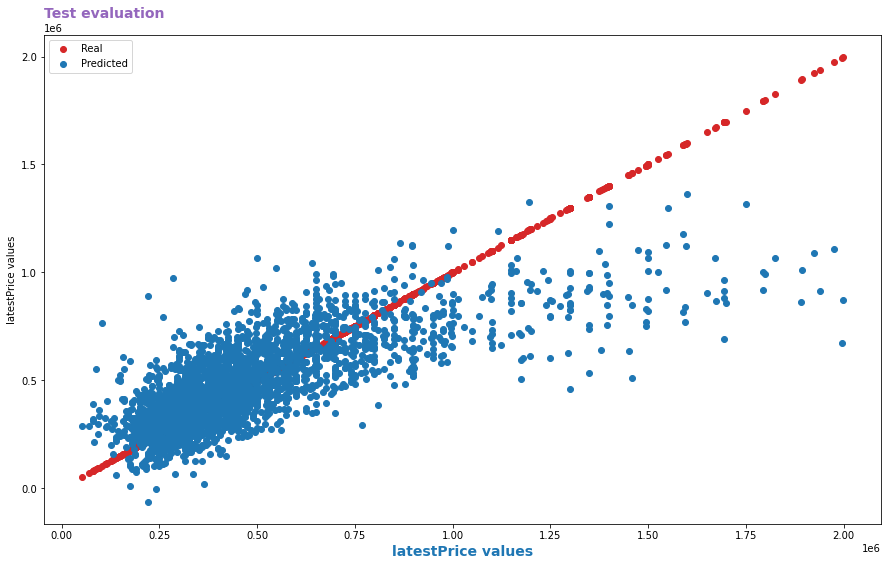

In [33]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("latestPrice values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

In [34]:
# Indicators of the model with test
print('Mean Absolute Error - test:', metrics.mean_absolute_error(y_test, prediction_test))  
print('Mean Squared Error - test:', metrics.mean_squared_error(y_test, prediction_test))  
print('Root Mean Squared Error - test:', np.sqrt(metrics.mean_squared_error(y_test, prediction_test)))

Mean Absolute Error - test: 123735.53339613923
Mean Squared Error - test: 31812738725.01923
Root Mean Squared Error - test: 178361.25903631435


In [35]:
# Model test error
#-------------------------------------------------------------------------------
#Measuring Goodness of fit in Training data

# Print R_squared and RMSE value
print('R2 Value in test:', round(metrics.r2_score(y_test, prediction_test),2))

#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))

test_set_rmse = np.sqrt(mean_squared_error(y_test, prediction_test))
print('RMSE in test: ', round(test_set_rmse,4))

# Residuals    
residuals_test=y_test - prediction_test

R2 Value in test: 0.56
Accuracy in test 70.94
RMSE in test:  178361.259
